# PCA-1 - Intro

Dimension reduction of data

## Step 1: Load the Data

In [1]:
import os
import urllib.request

data_location = "../data/cars/mtcars_header.csv"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/cars/mtcars_header.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: mtcars_header.csv


In [2]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

dataset = pd.read_csv(data_location)
print ('dataset.shape : ', dataset.shape)
dataset.sample(10)
# dataset

dataset.shape :  (32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
13,Merc 450SLC,15.20,8,275.80,180,3.07,3.78,18.00,0,0,3,3
18,Honda Civic,30.40,4,75.70,52,4.93,1.61,18.52,1,1,4,2
30,Maserati Bora,15.00,8,301.00,335,3.54,3.57,14.60,0,1,5,8
17,Fiat 128,32.40,4,78.70,66,4.08,2.20,19.47,1,1,4,1
28,Ford Pantera L,15.80,8,351.00,264,4.22,3.17,14.50,0,1,5,4
25,Fiat X1-9,27.30,4,79.00,66,4.08,1.94,18.90,1,1,4,1
12,Merc 450SL,17.30,8,275.80,180,3.07,3.73,17.60,0,0,3,3
21,Dodge Challenger,15.50,8,318.00,150,2.76,3.52,16.87,0,0,3,2
19,Toyota Corolla,33.90,4,71.10,65,4.22,1.83,19.90,1,1,4,1
3,Hornet 4 Drive,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1


## Step 2 - Explore Data

As we can see, this data has 12 columns.  We want to plot this data in 2D (X and Y axis).  So we need to reduce the dimensions to 2

In [3]:
dataset2 = dataset.drop(['model'], axis=1)
dataset2

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
1,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
2,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
3,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
4,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2
5,18.10,6,225.00,105,2.76,3.46,20.22,1,0,3,1
6,14.30,8,360.00,245,3.21,3.57,15.84,0,0,3,4
7,24.40,4,146.70,62,3.69,3.19,20.00,1,0,4,2
8,22.80,4,140.80,95,3.92,3.15,22.90,1,0,4,2
9,19.20,6,167.60,123,3.92,3.44,18.30,1,0,4,4


## Step 3 - Scale Data

We need to scale data before PCA

There are 2 options
1. Using Standard scaler
2. Using built-in pandas functions

In [4]:
## Option -1 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler ()

scaled = scaler.fit_transform(dataset2)
scaled_data = pd.DataFrame(scaled, columns = dataset2.columns)
scaled_data.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.15,-0.11,-0.58,-0.54,0.58,-0.62,-0.79,-0.88,1.21,0.43,0.75
1,0.15,-0.11,-0.58,-0.54,0.58,-0.36,-0.47,-0.88,1.21,0.43,0.75
2,0.46,-1.24,-1.01,-0.80,0.48,-0.93,0.43,1.13,1.21,0.43,-1.14
3,0.22,-0.11,0.22,-0.54,-0.98,-0.00,0.90,1.13,-0.83,-0.95,-1.14
4,-0.23,1.03,1.06,0.42,-0.85,0.23,-0.47,-0.88,-0.83,-0.95,-0.51
5,-0.34,-0.11,-0.05,-0.62,-1.59,0.25,1.35,1.13,-0.83,-0.95,-1.14
6,-0.98,1.03,1.06,1.46,-0.73,0.37,-1.14,-0.88,-0.83,-0.95,0.75
7,0.73,-1.24,-0.69,-1.25,0.18,-0.03,1.22,1.13,-0.83,0.43,-0.51
8,0.46,-1.24,-0.74,-0.77,0.61,-0.07,2.87,1.13,-0.83,0.43,-0.51
9,-0.15,-0.11,-0.52,-0.35,0.61,0.23,0.26,1.13,-0.83,0.43,0.75


In [5]:
## Option 2 

scaled_data = (dataset2 - dataset2.mean()) / dataset2.std()
scaled_data.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.15,-0.10,-0.57,-0.54,0.57,-0.61,-0.78,-0.87,1.19,0.42,0.74
1,0.15,-0.10,-0.57,-0.54,0.57,-0.35,-0.46,-0.87,1.19,0.42,0.74
2,0.45,-1.22,-0.99,-0.78,0.47,-0.92,0.43,1.12,1.19,0.42,-1.12
3,0.22,-0.10,0.22,-0.54,-0.97,-0.00,0.89,1.12,-0.81,-0.93,-1.12
4,-0.23,1.01,1.04,0.41,-0.84,0.23,-0.46,-0.87,-0.81,-0.93,-0.50
5,-0.33,-0.10,-0.05,-0.61,-1.56,0.25,1.33,1.12,-0.81,-0.93,-1.12
6,-0.96,1.01,1.04,1.43,-0.72,0.36,-1.12,-0.87,-0.81,-0.93,0.74
7,0.72,-1.22,-0.68,-1.24,0.17,-0.03,1.20,1.12,-0.81,0.42,-0.50
8,0.45,-1.22,-0.73,-0.75,0.60,-0.07,2.83,1.12,-0.81,0.42,-0.50
9,-0.15,-0.10,-0.51,-0.35,0.60,0.23,0.25,1.12,-0.81,0.42,0.74


## Step 4 - PCA

In [6]:
from sklearn.decomposition import PCA

# we are doing 2 PC
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns = ['pc1', 'pc2'])
pca_df.head(10)

,pc1,pc2
0,0.65,1.71
1,0.62,1.53
2,2.74,-0.14
3,0.31,-2.33
4,-1.94,-0.74
5,0.06,-2.74
6,-2.96,0.33
7,2.02,-1.44
8,2.25,-1.95
9,0.52,-0.16


## Step 5 - Plot

Now let's plot the reduced data

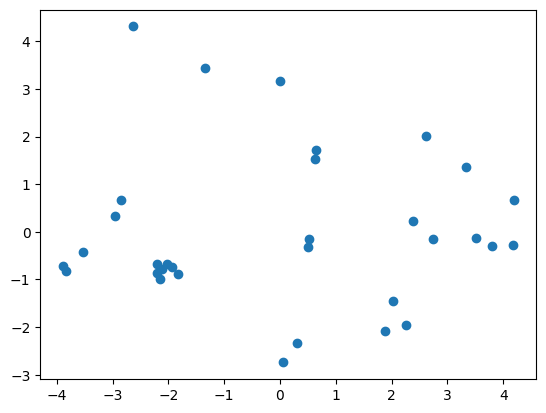

In [7]:
import matplotlib.pyplot as plt

plt.scatter(pca_df['pc1'], pca_df['pc2'], marker='o')
plt.show()

## Step 6 - Compare Correlation Matrices

Now let's compare correlation matrix of original data and PCA data.

TODO: Can you explain the difference?

In [8]:
# original data
scaled_data.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


In [9]:
# pca
pca_df.corr()

,pc1,pc2
pc1,1.00,-0.00
pc2,-0.00,1.00


## Step 7 - Understanding PCA

[SKLearn PCA reference](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA)

* `pca.components_`  : Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_
* `pca.explained_variance_ratio_` : Percentage of variance explained by each of the selected components.


In [10]:
print ('\n number of columns in original data : ', scaled_data.shape[1])
print ('\n each pca component length : ',  len(pca.components_[0]))
print ('\n pca.components_ :\n',  pca.components_)
print ('\n pca.explained_variance_ratio_ : ' , pca.explained_variance_ratio_)


 number of columns in original data :  11

 each pca component length :  11

 pca.components_ :
 [[ 0.3625305  -0.37391603 -0.3681852  -0.33005692  0.29415138 -0.34610332
   0.20045635  0.30651132  0.23494289  0.20691624 -0.21401766]
 [ 0.0161244   0.04374371 -0.04932413  0.24878402  0.27469408 -0.14303825
  -0.46337482 -0.23164699  0.42941765  0.46234863  0.41357106]]

 pca.explained_variance_ratio_ :  [0.60076366 0.24095163]


## Step 8 - Find 3 Principal Components 

In [13]:
## TODO - you code goes here
## Adjust your code from step-4

pca = PCA(n_components = 4)

pca_data3 = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data3, columns = ['pc1', 'pc2','pc3','pc4'])
pca_df.head(10)


,pc1,pc2,pc3,pc4
0,0.65,1.71,-0.59,0.11
1,0.62,1.53,-0.38,0.20
2,2.74,-0.14,-0.24,-0.25
3,0.31,-2.33,-0.13,-0.50
4,-1.94,-0.74,-1.12,0.07
5,0.06,-2.74,0.16,-0.98
6,-2.96,0.33,-0.36,-0.05
7,2.02,-1.44,0.93,-0.14
8,2.25,-1.95,1.77,0.29
9,0.52,-0.16,1.47,0.07


Let's do a cool 3D plot using plotly

If plotly is missing, you can install it like below

In [ ]:
# ! conda install -y plotly
# ! jupyter labextension install jupyterlab-plotly

In [14]:
import plotly.express as px

fig = px.scatter_3d(pca_data3, x=0, y=1, z=2,labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()
#plt.scatter(pca_df_3['pc1'],pca_df_3['pc2'],pca_df_3['pc3'],marker='X')
#plt.show()